# Диагностика и кривые обучения

### Задания для выполнения
1) Загрузите датасет breast_cancer.

2) Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

3) Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

4) Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

5) Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):

    - собрать больше объектов наблюдения;
    - провести обучение на меньшем объеме данных;
    - исключить часть признаков из модели;
    - добавить новые признаки в модель;
    - добавить полиномиальные признаки;
    - попробовать более сложные модели;
    - попробовать более простые модели;
    - увеличить регуляризацию модели;
    - уменьшить регуляризацию модели;
    
6) Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

7) Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

8) Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

9) Найдите методом подбора оптимальное значение параметра регуляризации (примерное).\

10) Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

##### Импортируем нужные библиотеки

In [32]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель?

In [17]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)

In [18]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.676056338028169
0.7272727272727273


## Гауссово ядро

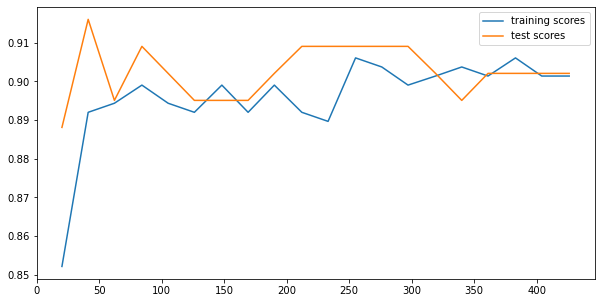

In [19]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

##### Видим отсутсвие недообучения и переобучения, все хорошо обучилось.

### Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

In [20]:
def find_optim(x):
    training_scores = []
    test_scores = []
    numbers = []
    
    for i in np.linspace(20, len(X_train), 20):
        clf = SVC(C= x, kernel='rbf')
        X = X_train[:int(i)]
        y = y_train[:int(i)]
        clf.fit(X, y)
        numbers.append(int(i))
        training_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))

    plt.figure(figsize=(10, 5))
    plt.plot(numbers, training_scores, label="training scores")
    plt.plot(numbers, test_scores, label="test scores")
    plt.title('C = '+str(x))
    plt.legend(loc="best")

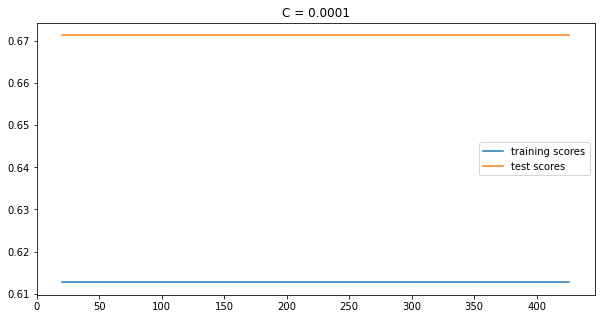

In [21]:
find_optim(0.0001)

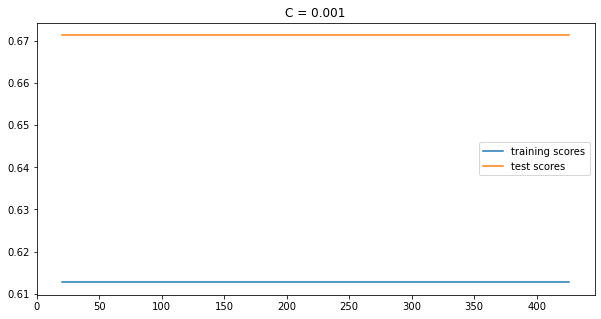

In [22]:
find_optim(0.001)

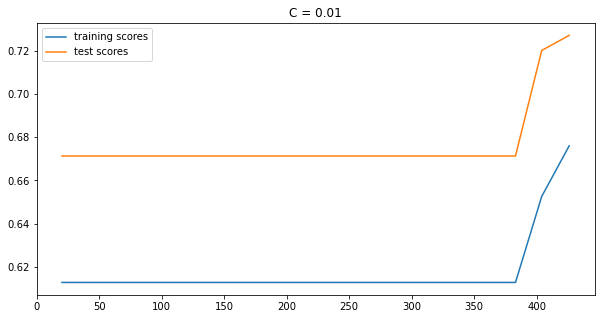

In [23]:
find_optim(0.01)

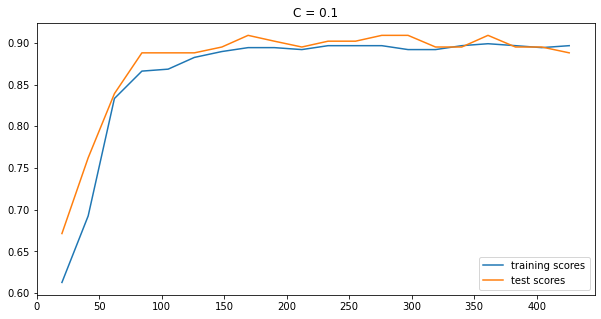

In [24]:
find_optim(0.1)

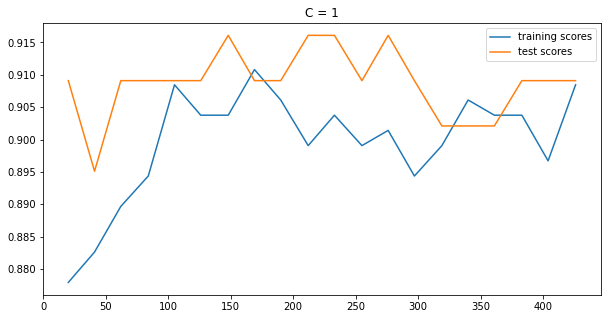

In [25]:
find_optim(1)

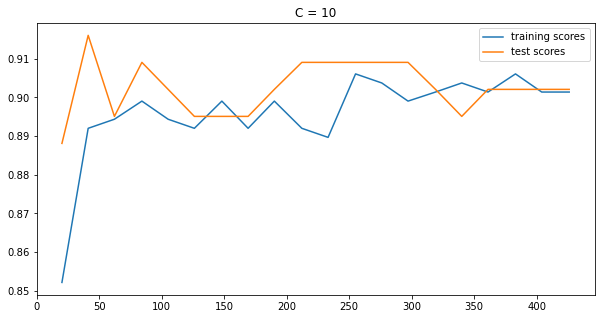

In [26]:
find_optim(10)

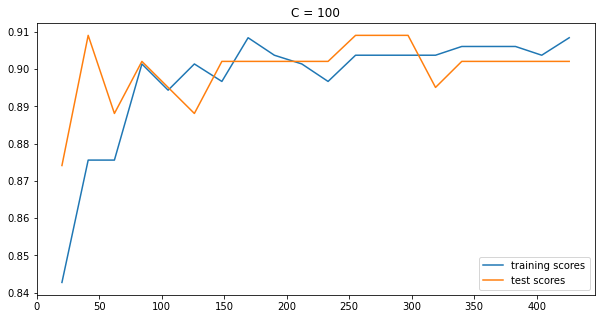

In [27]:
find_optim(100)

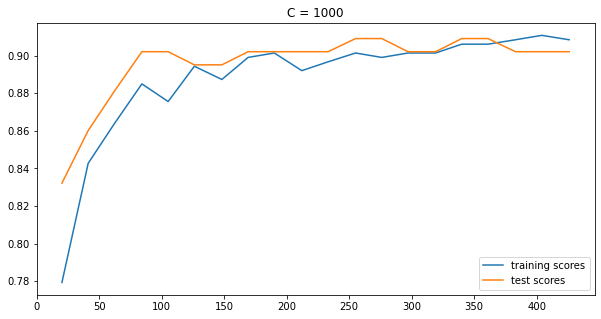

In [28]:
find_optim(1000)

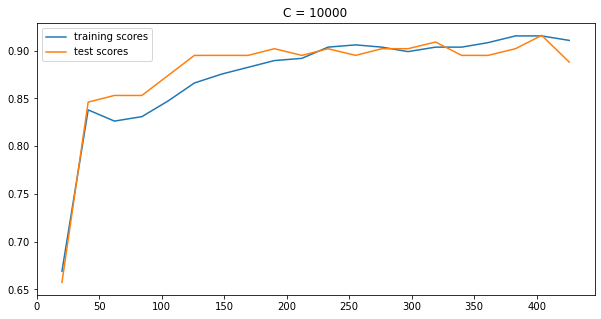

In [29]:
find_optim(10000)

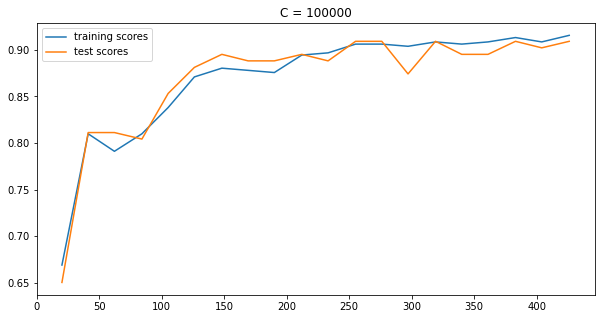

In [30]:
find_optim(100000)

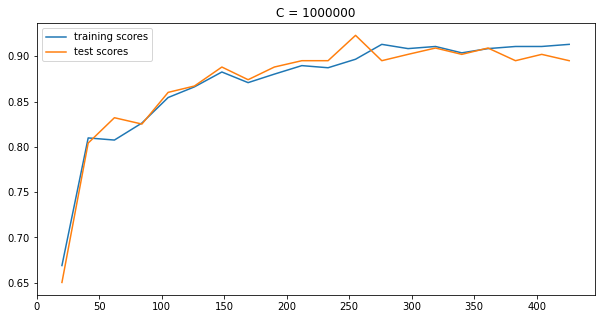

In [31]:
find_optim(1000000)

##### Самым оптимальным является значение 0.1 , так как при увеличении параметра C мы уже можем наблюдать примеры переобучения

### Найдите методом подбора оптимальное значение параметра регуляризации (примерное)

In [33]:
params = {"C":[0.0001, 0.001, 0.05, 0.1, 1, 5, 10, 30, 100, 215, 600, 1000, 7000, 40000, 100000, 1000000]}
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
model = SVC()
model_check_best = GridSearchCV(model, params).fit(X_2d, y)
print('Оптимальным значением параметра регуляризации, полученный методом подбора, является', model_check_best.best_params_)

Оптимальным значением параметра регуляризации, полученный методом подбора, является {'C': 0.1}


##### Оказалось наше предположение верно и действительно 0.1 является лучшим значением параметра C для данной модели

## Линейное ядро

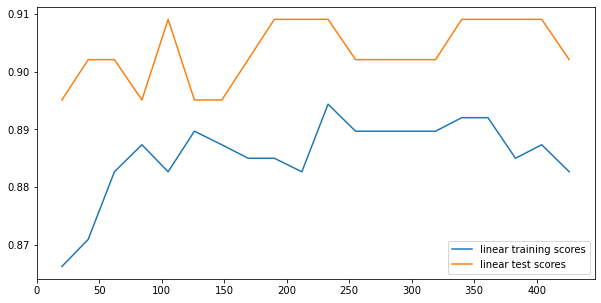

In [36]:
linear_training_scores = []
linear_test_scores = []
linear_numbers = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC(C=10, kernel='linear')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    linear_numbers.append(int(i))
    linear_training_scores.append(clf.score(X_train, y_train))
    linear_test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(linear_numbers, linear_training_scores, label="linear training scores")
plt.plot(linear_numbers, linear_test_scores, label="linear test scores")
plt.legend(loc="best")

##### Мы можем наблюдать что модель не до конца обучена, а значит попробуем поменять параметр регуляризации

In [46]:
def linear_find_optim(x):
    linear_training_scores = []
    linear_test_scores = []
    linear_numbers = []

    for i in np.linspace(20, len(X_train), 20):
        clf = SVC(C=x, kernel='linear')
        X = X_train[:int(i)]
        y = y_train[:int(i)]
        clf.fit(X, y)
        linear_numbers.append(int(i))
        linear_training_scores.append(clf.score(X_train, y_train))
        linear_test_scores.append(clf.score(X_test, y_test))

    plt.figure(figsize=(10, 5))
    plt.plot(linear_numbers, linear_training_scores, label="linear training scores")
    plt.plot(linear_numbers, linear_test_scores, label="linear test scores")
    plt.title('C = '+str(x))
    plt.legend(loc="best")

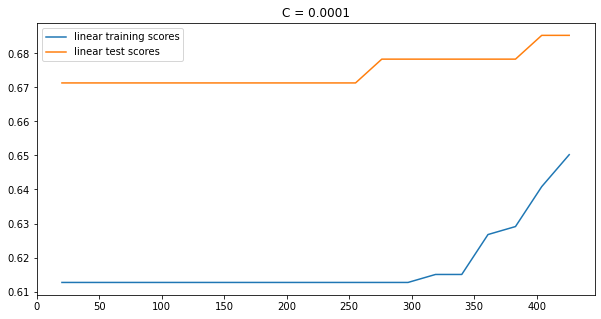

In [47]:
linear_find_optim(0.0001)

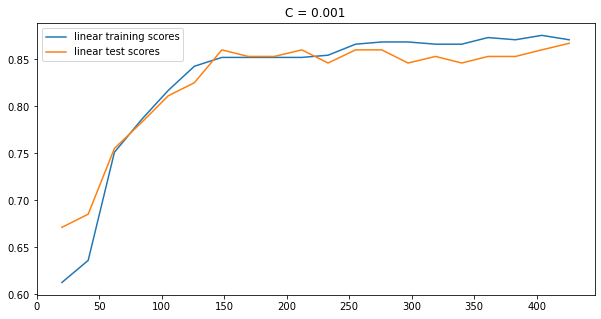

In [48]:
linear_find_optim(0.001)

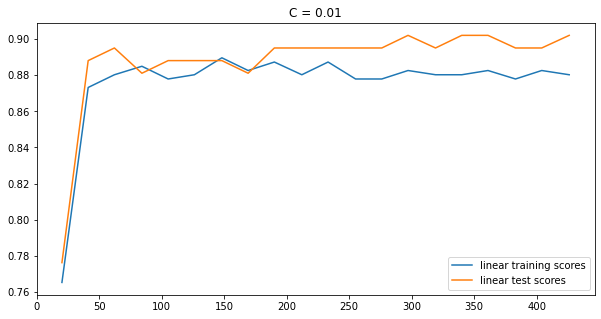

In [49]:
linear_find_optim(0.01)

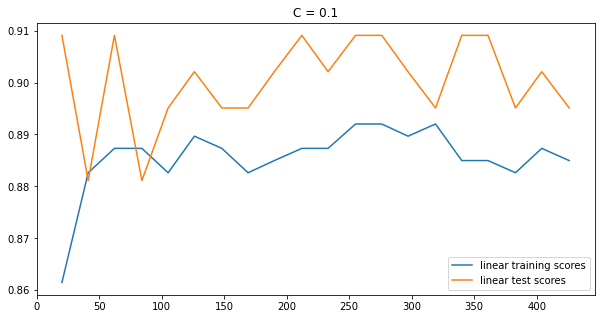

In [50]:
linear_find_optim(0.1)

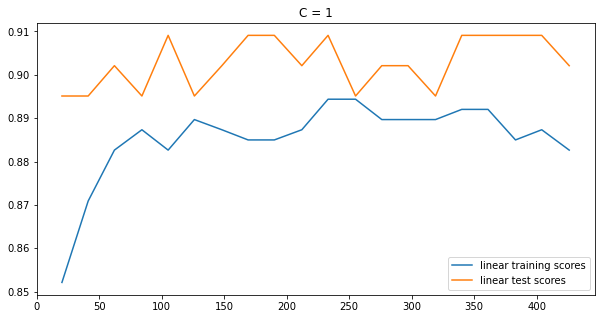

In [51]:
linear_find_optim(1)

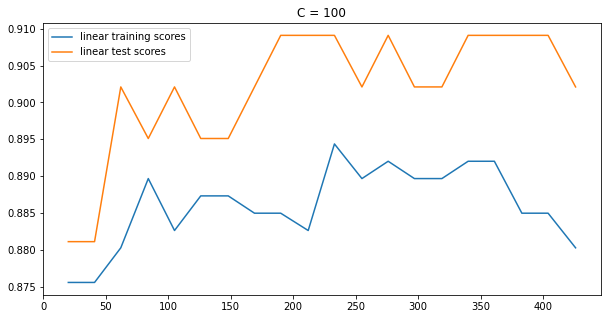

In [52]:
linear_find_optim(100)

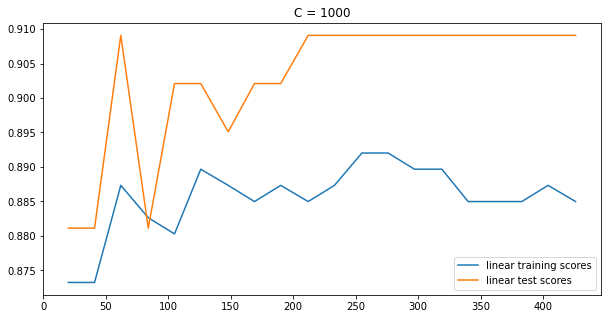

In [53]:
linear_find_optim(1000)

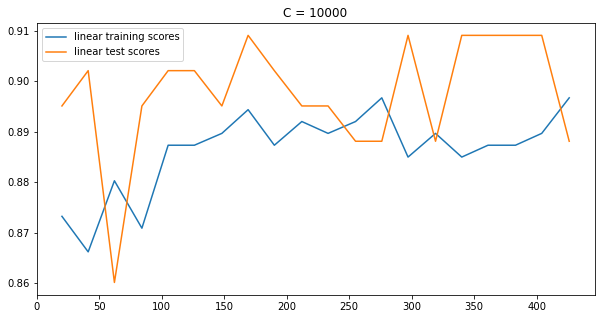

In [54]:
linear_find_optim(10000)

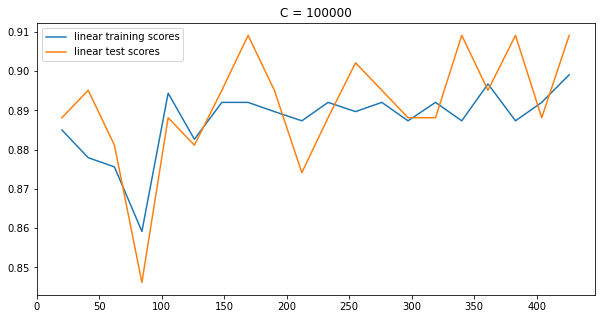

In [55]:
linear_find_optim(100000)

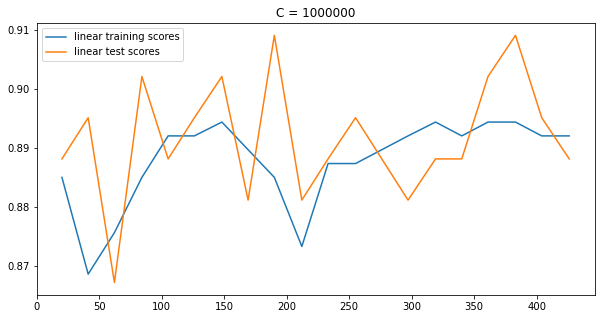

In [56]:
linear_find_optim(1000000)

##### Самым оптимальным является значение 0.001, так как при увеличении числа c мы уже можем наблюдать примеры переобучения

In [58]:
params = {"C":[0.0001, 0.001, 0.05, 0.1, 1, 5, 10, 30, 100, 215, 600, 1000, 7000, 40000, 100000, 1000000]}
X = breast_cancer.data
y = breast_cancer.target
X_2d = X[:, :2]
model_lin = SVC(kernel='linear')
model_lin_check_best = GridSearchCV(model, params).fit(X_2d, y)
print('Оптимальным значением параметра регуляризации, полученный методом подбора, является', model_lin_check_best.best_params_)

Оптимальным значением параметра регуляризации, полученный методом подбора, является {'C': 0.1}


##### Оказалось наше предположение верно и действительно 0.001 является лучшим значением параметра C для данной модели